# General Dependencies

In [5]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import yfinance as yf
import datetime

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

print("Libraries imported")

Libraries imported


# Download starting dataset

In [ ]:
training_set = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
training_set = training_set[['Close']]
training_set['Change'] = training_set['Close'].pct_change()
training_set = training_set.dropna()
print(training_set.head())

test_set = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
test_set = test_set[['Close']]
test_set['Change'] = test_set['Close'].pct_change()
test_set = test_set.dropna()
print(test_set.head())


[*********************100%***********************]  1 of 1 completed


Price          Close    Change
Ticker          AAPL          
Date                          
2010-01-05  6.451466  0.001729
2010-01-06  6.348847 -0.015906
2010-01-07  6.337110 -0.001849
2010-01-08  6.379239  0.006648
2010-01-11  6.322968 -0.008821


[*********************100%***********************]  1 of 1 completed

Price           Close    Change
Ticker           AAPL          
Date                           
2020-01-03  72.009117 -0.009722
2020-01-06  72.582916  0.007968
2020-01-07  72.241562 -0.004703
2020-01-08  73.403648  0.016086
2020-01-09  74.962799  0.021241


## Some starting visualisation

/tmp/ipykernel_484/76592147.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18, loc="upper left")


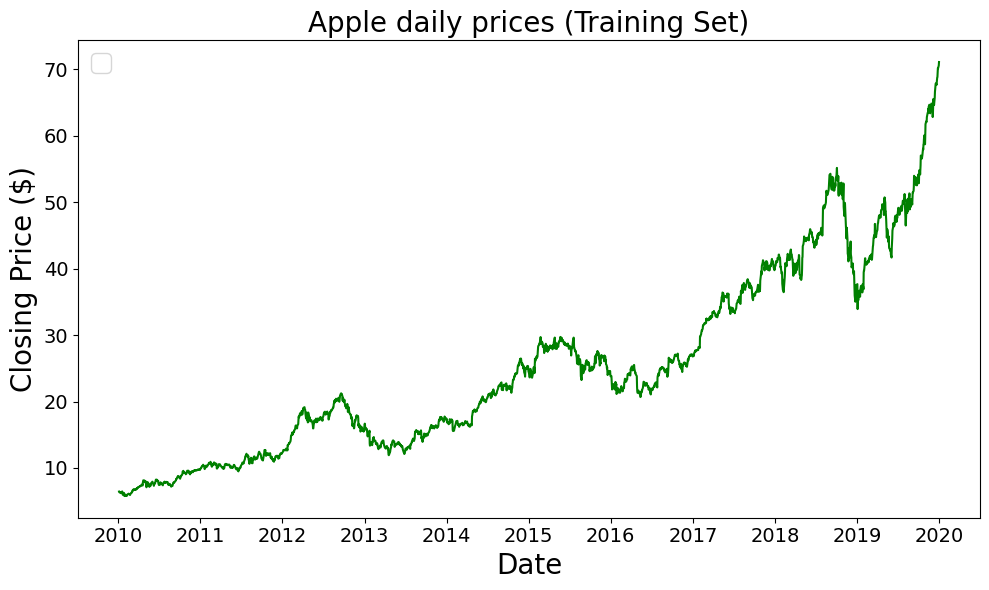

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(
  training_set.index,
  training_set['Close'],
  #label="Close Price ($)",
  color="green"
)
#plt.legend(fontsize=18, loc="upper left")
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("Closing Price ($)", fontsize=20)
plt.title("Apple daily prices (Training Set)", fontsize=20)
plt.tight_layout()

Main Statitics:


count    2515.000000
mean        0.001087
std         0.016220
min        -0.123558
25%        -0.006749
50%         0.000943
75%         0.009820
max         0.088741
Name: Change, dtype: float64

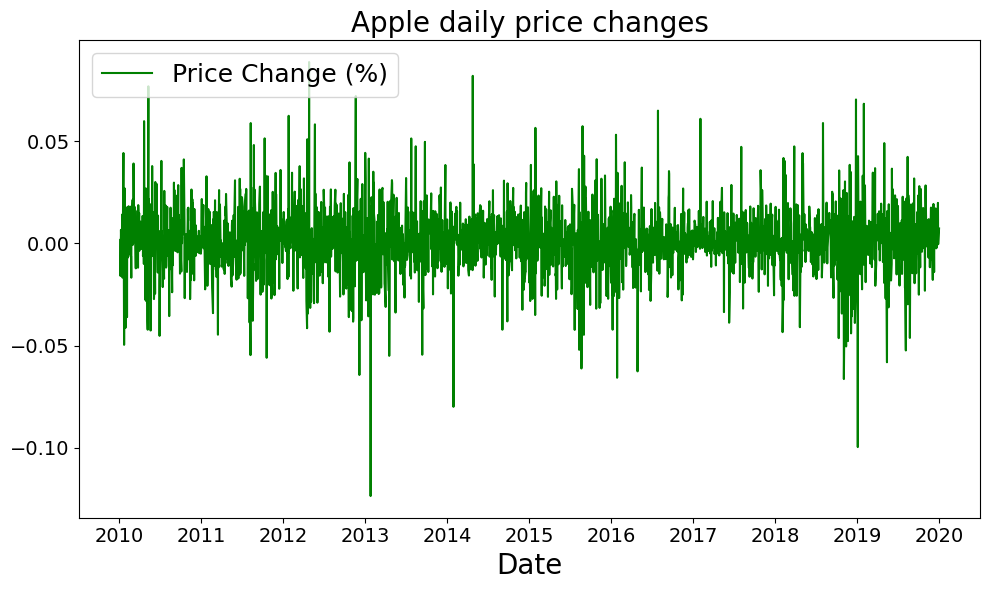

In [22]:
plt.figure(figsize=(10,6))
plt.plot(
  training_set.index,
  training_set['Change'],
  label="Price Change (%)",
  color="green"
)
plt.legend(fontsize=18, loc="upper left")
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=14)
plt.title("Apple daily price changes", fontsize=20)
plt.tight_layout()
print("Main Statitics:")
training_set['Change'].describe()

As seen from the statistics above, stock prices can fluctuate greatly, and in the case of Apple, daily change has a standard deviation of 1.6%, while having a mean of 0.1%. This showcases the main problem of stock price prediction: trying to find patterns in a stochastic system, which has so much noise, that there is hardly any system to it. In real life, models are retrained frequently, because of the constant change of the market.

# Fitting Linear Regression model on RSI Indicator